# Multi-label classification neural network on COVID data

The main goal of this code is to develope a prediction model for prognosis of COVID-19 patients based on classification approach with multiple outcomes

Moreover, specific goals of this code includes:

- Developing a prediction model for the prognosis of COVID-19 patients based on classification approach to predict mortality
- Developing a prediction model for the prognosis of COVID-19 patients based on classification approach to predict ICU admission
- Developing a prediction model for the prognosis of COVID-19 patients based on classification approach to predict intubation
- Developing a prediction model for the prognosis of COVID-19 patients based on classification approach to predict dialysis


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 1) Reading database and feature selection

- The name of my database is final_covid, which is a selected part of main covid database.
- All features with missing data exceeds 50% has been removed.
- All feature values are numeric, some of them are categorical and some of them are continious.
- Here we gonna select our feature based on ANOVA index and corresponding p-value for each feature per four outcomes


In [2]:
Data_frame = pd.read_csv ('final_data.csv')
Data_columns = Data_frame.columns.tolist()
print (Data_columns)

['Outcome_InhospitalMortality', 'Outcome_LOS', 'Outcome_ICUadmission', 'Outcome_ICULOS', 'Demographic_Age', 'Demographic_Gender', 'symtpm_to_referral', 'Symptom_Caugh', 'Symptom_Dyspnea', 'Symptom_Fever', 'Symptom_Chiver', 'Symptom_Mylagia', 'Symptom_Weakness', 'Symptom_LOC', 'Symptom_Sorethrough', 'Symptom_Rhinorrhea', 'Symptom_Smellingdisorder', 'Symptom_nauseaVomit', 'Symptom_Anorexia', 'Symptom_Diarhhea', 'Symptom_ChestPain', 'Symptom_Seizure', 'Symptom_SkinLesion', 'Symptom_Jointpain', 'Symptom_Headache', 'Symptom_AbdominalPain', 'Symptom_Earpain', 'Symptom_Hemorrhasia', 'Symptom_Hemiparesia', 'MH_Pregcy', 'MH_CurremtSmoker', 'MH_Alcoholuser', 'MH_Opiumuser', 'MH_Hookahuser', 'MH_HTN', 'MH_IHD', 'MH_CABG', 'MH_CHF', 'MH_Ashtma', 'MH_COPD', 'MH_DM', 'MH_Pneumonia', 'MH_CVA', 'MH_GIdisorder', 'MH_CKD', 'MH_RA', 'Cancer', 'MH_HLP', 'MH_HepC', 'MH_Thyroiddysfunction', 'MH_Immunocompromised', 'MH_ChronicSeizure', 'MH_TB', 'MH_Anemia', 'MH_Fattyliver', 'MH_Psychologicaldisorder', 'MH_Pa

In [4]:
Categorical_variables = [ 'Outcome_LOS', 'Outcome_ICULOS',  
                         'Demographic_Gender', 'Symptom_Caugh', 'Symptom_Dyspnea', 'Symptom_Fever', 'Symptom_Chiver',
                         'Symptom_Mylagia', 'Symptom_Weakness', 'Symptom_LOC', 'Symptom_Sorethrough', 'Symptom_Rhinorrhea',
                         'Symptom_Smellingdisorder', 'Symptom_nauseaVomit', 'Symptom_Anorexia', 'Symptom_Diarhhea', 'Symptom_ChestPain',
                         'Symptom_Seizure', 'Symptom_SkinLesion', 'Symptom_Jointpain', 'Symptom_Headache', 'Symptom_AbdominalPain',
                         'Symptom_Earpain', 'Symptom_Hemorrhasia', 'Symptom_Hemiparesia', 'MH_Pregcy',
                         'MH_CurremtSmoker', 'MH_Alcoholuser', 'MH_Opiumuser', 'MH_Hookahuser', 'MH_HTN', 'MH_IHD',
                         'MH_CABG', 'MH_CHF', 'MH_Ashtma', 'MH_COPD', 'MH_DM', 'MH_Pneumonia', 'MH_CVA', 'MH_GIdisorder', 'MH_CKD', 'MH_RA',
                         'Cancer', 'MH_HLP', 'MH_HepC', 'MH_Thyroiddysfunction', 'MH_Immunocompromised', 'MH_ChronicSeizure', 'MH_TB',
                         'MH_Anemia', 'MH_Fattyliver', 'MH_Psychologicaldisorder', 'MH_Parkinson', 'MH_Alzhimer',   'TM_S_Wholeblood', 'TM_S_FFP/Platelet',
                         'TM_S_Plasmapheresis', 'TM_amantadin', 'TM_ASA', 'TM_atazonavir', 'TM_Atorvastatin', 'TM_Atrovent',
                         'TM_Azithromycin', 'TM_Bromhexine', 'TM_CaCo3', 'TM_Ceftriaxone', 'TM_Celexan', 'TM_Cilindamycin', 'TM_Ciprofloxacine',
                         'TM_ClidiniumC', 'TM_Combivent', 'TM_Dexamethasone', 'TM_Dextromethorphan', 'TM_Dimenhydranate', 'TM_Diphenhydramin',
                         'TM_Fluconazole', 'TM_Heparin', 'TM_hidroxycholoriquine', 'TM_imipenem', 'TM_Interferon', 'TM_kaletra', 
                         'TM_Levofluxacin', 'TM_Linezolid', 'TM_Meropenem', 'TM_MgSo4', 'TM_NAC', 'TM_Ondancetrone', 'TM_oseltamivir',
                         'TM_piperacillin', 'TM_Plasil', 'TM_Plavix', 'TM_Prednisolone', 'TM_Promethazine', 'TM_Pulmi', 'TM_Ranitidin', 
                         'TM_Remdesivir', 'TM_Ribavirin', 'TM_Salb', 'TM_Selenium', 'TM_Serflow', 'TM_sovodac', 'TM_Vanco', 'TM_VitB', 
                         'TM_VitC', 'TM_VitD', 'TM_pantazole', 'TM_concor(bisoprolo)', 'TM_amilodiopine', 'TM_Aldactone', 'TM_lactalose',
                         'TM_carvidolol', 'TM_fentanyl', 'TM_apotel', 'TM_Zinc', 'TM_Insuline', 'TM_lasix', 'TM_Hematinic', 'TM_albumin']

Continious_variables = ['Demographic_Age','symtpm_to_referral','VS_O2satwithoutsupp',
                         'VS_PR', 'VS_diastolicBP', 'VS_SystolicBP', 'VS_RR', 'VS_T','LAB_WBC_1', 'LAB_WBC_Final', 'LAB_LYMPHH_1',
                         'LAB_LYMPHH_Final', 'LAB_NEUT_1', 'LAB_NEUT_Final', 'LAB_PLT_1', 'LAB_PLT_Final', 'LAB_HB_1', 'LAB_HB_Final',
                         'LAB_MCV_1', 'LAB_MCV_Final', 'LAB_BUN_Final', 'LAB_CR_1', 'LAB_CR_Final', 'LAB_NA_First', 'LAB_NA_Final', 
                         'LAB_K_First', 'LAB_K_Final', 'LAB_AST_Final', 'LAB_ALT_Final', 'LAB_ALKP_First', 'LAB_CRP_Final', 'LAB_ESR_First',
                         'LAB_CPK_First', 'LAB_PTT_First', 'LAB_PT_First', 'LAB_INR_First', 'LAB_PH_Final', 'LAB_HCO3_Final', 'LAB_BE_Final' ]

Output_features = ['Outcome_InhospitalMortality','Outcome_ICUadmission','TM_S_Dialysis','TM_S_Intubation']

missing_counts = Data_frame.isnull().sum()
print(missing_counts)

Outcome_InhospitalMortality      79
Outcome_LOS                       1
Outcome_ICUadmission              0
Outcome_ICULOS                    3
Demographic_Age                   6
                               ... 
LAB_PT_First                   4040
LAB_INR_First                  4036
LAB_PH_Final                   3291
LAB_HCO3_Final                 3304
LAB_BE_Final                   3539
Length: 161, dtype: int64


## 1-1) Imputaion



In [5]:
from sklearn.impute import SimpleImputer

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(Data_frame [Categorical_variables])
Data_frame [Categorical_variables] = imp_cat.transform(Data_frame [Categorical_variables])

imp_con = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_con.fit(Data_frame [Continious_variables])
Data_frame [Continious_variables] = imp_con.transform(Data_frame [Continious_variables])

missing_counts = Data_frame.isnull().sum()
print(missing_counts)

Data_frame.dropna(subset=['Outcome_InhospitalMortality'], inplace=True)

missing_outcomes = Data_frame[Output_features].isnull().sum()
print(missing_outcomes)

Outcome_InhospitalMortality    79
Outcome_LOS                     0
Outcome_ICUadmission            0
Outcome_ICULOS                  0
Demographic_Age                 0
                               ..
LAB_PT_First                    0
LAB_INR_First                   0
LAB_PH_Final                    0
LAB_HCO3_Final                  0
LAB_BE_Final                    0
Length: 161, dtype: int64
Outcome_InhospitalMortality    0
Outcome_ICUadmission           0
TM_S_Dialysis                  0
TM_S_Intubation                0
dtype: int64


## 1-2) feature selection 

- ANOVA index and corresponding p-value will calcualted for all features
- a higher F-value and a lower p-value generally indicate a stronger relationship between a feature and the target variable.

In [6]:
from sklearn.feature_selection import f_classif

# Separate the features and outputs
X = Data_frame.drop(columns= Output_features)
list_of_FS = list ()


for i in Output_features:
    y = Data_frame [i] 
    f_values, p_values = f_classif(X, y)
    anova_results = pd.DataFrame({'Feature': X.columns, 'F-value': f_values, 'p-value': p_values})
    anova_results = anova_results.sort_values('p-value')
    anova_results.to_csv('anova_results.csv',mode='a', index=False)

In [7]:
# Print the feature rankings
from IPython.display import display
df = pd.read_csv('anova_results.csv')

# Display the DataFrame as a table
display(df.head (30))

,Mortality,Unnamed: 1,Unnamed: 2,ICU admission,Unnamed: 4,Unnamed: 5,Dialysis,Unnamed: 7,Unnamed: 8,Intubation,Unnamed: 10,Unnamed: 11
0,Feature,F-value,p-value,Feature,F-value,p-value,Feature,F-value,p-value,Feature,F-value,p-value
1,LAB_BUN_Final,2058.804293,0,Outcome_ICULOS,7306.190251,0,LAB_CR_Final,2454.75419,0,TM_fentanyl,1109.408235,1.43E-229
2,TM_fentanyl,1324.86435,7.56E-271,Outcome_LOS,720.5735977,8.59E-153,LAB_CR_1,2313.904381,0,Outcome_ICULOS,1090.714903,6.00E-226
3,LAB_BE_Final,1171.276988,1.63E-241,TM_fentanyl,688.2411039,2.86E-146,MH_CKD,970.5738127,1.67E-202,LAB_BUN_Final,559.7292012,4.04E-120
4,TM_Vanco,1112.854332,3.08E-230,TM_Vanco,537.9690024,1.17E-115,LAB_BUN_Final,439.1439102,2.96E-95,VS_O2satwithoutsupp,536.6455809,2.19E-115
5,Demographic_Age,938.6322921,3.19E-196,VS_O2satwithoutsupp,466.3672472,6.75E-101,TM_S_Wholeblood,371.1384088,4.38E-81,TM_Vanco,502.7223704,2.09E-108
6,VS_O2satwithoutsupp,919.7428278,1.69E-192,LAB_BUN_Final,387.7472043,1.48E-84,LAB_BE_Final,336.8912518,6.58E-74,TM_Meropenem,374.5286835,8.56E-82
7,LAB_CR_Final,851.7615128,4.89E-179,TM_NAC,318.9580735,3.87E-70,TM_CaCo3,285.1218608,5.26E-63,LAB_BE_Final,335.0055261,1.64E-73
8,Outcome_ICULOS,844.9844776,1.09E-177,TM_S_Wholeblood,241.4075021,9.56E-54,LAB_HB_Final,252.6324717,3.96E-56,Symptom_LOC,301.0953127,2.24E-66
9,LAB_HCO3_Final,791.1816984,5.81E-167,TM_lasix,241.0637353,1.13E-53,TM_Vanco,237.7861831,5.62E-53,LAB_LYMPHH_Final,246.7472524,7.02E-55


In [8]:
pre_Final_features = ['LAB_BUN_Final','LAB_BUN_Final', 'LAB_BE_Final', 'Demographic_Age',
                      'VS_O2satwithoutsupp', 'LAB_CR_Final', 'Outcome_ICULOS', 'LAB_HCO3_Final', 'LAB_NEUT_Final',
                      'LAB_LYMPHH_Final','Symptom_LOC', 'LAB_CRP_Final', 'Outcome_ICULOS', 'Outcome_LOS', 
                      'VS_O2satwithoutsupp', 'LAB_BUN_Final',
                      'LAB_LYMPHH_Final', 'LAB_WBC_Final', 'LAB_CR_Final', 'LAB_CR_1',
                      'MH_CKD', 'LAB_BUN_Final', 'LAB_BE_Final', 'LAB_HB_Final',
                      'LAB_HCO3_Final',  'LAB_HB_1',
                      'Outcome_ICULOS', 'LAB_BUN_Final', 'VS_O2satwithoutsupp','LAB_BE_Final',
                      'Symptom_LOC', 'LAB_LYMPHH_Final', 'Outcome_LOS', 'LAB_NEUT_Final', 'LAB_CR_Final','LAB_HCO3_Final',
                      'LAB_WBC_Final','LAB_PLT_Final', 'LAB_PH_Final', 'LAB_K_Final', 'LAB_NEUT_1', 'LAB_LYMPHH_1',
                      'LAB_AST_Final', 'LAB_HB_Final', 'LAB_NA_Final', 'LAB_CR_1', 'MH_HTN', 'LAB_NEUT_1', 'LAB_LYMPHH_1', 
                      'LAB_NEUT_Final', 'Symptom_LOC', 'Demographic_Age', 'LAB_BE_Final', 'LAB_CR_Final', 'LAB_PH_Final',
                      'Outcome_ICULOS', 'LAB_K_Final', 'Outcome_LOS', 'MH_HTN', 'LAB_PLT_Final', 'LAB_CRP_Final', 
                      'LAB_PH_Final', 'Demographic_Age', 'LAB_PH_Final', 'LAB_WBC_Final', 'LAB_CRP_Final',
                      'LAB_LYMPHH_1', 'LAB_NEUT_1', 'LAB_PLT_Final',
                      'LAB_HB_Final', 'LAB_NA_Final', 'MH_CVA', 'MH_DM', 'LAB_AST_Final', 'VS_PR', 'LAB_PLT_Final','Cancer',
                      'MH_Alzhimer','MH_IHD', 'VS_RR' ]

Final_features = list(set(pre_Final_features))
Total_features = Final_features + Output_features
cdf = Data_frame [Total_features]
print (Final_features)
print (len (Final_features))

['LAB_LYMPHH_1', 'VS_O2satwithoutsupp', 'MH_DM', 'LAB_CR_1', 'MH_Alzhimer', 'LAB_CRP_Final', 'LAB_LYMPHH_Final', 'Symptom_LOC', 'LAB_PLT_Final', 'Cancer', 'LAB_AST_Final', 'LAB_BUN_Final', 'MH_IHD', 'LAB_NEUT_1', 'MH_CVA', 'LAB_PH_Final', 'LAB_WBC_Final', 'Outcome_LOS', 'LAB_NEUT_Final', 'LAB_HB_1', 'LAB_HCO3_Final', 'LAB_K_Final', 'LAB_HB_Final', 'MH_CKD', 'Demographic_Age', 'LAB_BE_Final', 'Outcome_ICULOS', 'MH_HTN', 'LAB_CR_Final', 'VS_PR', 'LAB_NA_Final', 'VS_RR']
32


## 2)  Data selection and splitting

In [9]:
# Data selection and (the first) preprocessing

X = np.asarray (cdf [Final_features])
X = preprocessing.StandardScaler().fit(X).transform(X)
y = np.asarray (cdf [Output_features])

X = X.astype('float32')
y = y.astype('float32')

# train/test split 

x_train, x_test, y_train, y_test = train_test_split (X,y,test_size = 0.2, random_state = 4)

## 3) Hypervariable

- Hypervariable determination is necessary before model developement 

In [10]:
# first we need to know haw many layers and how many neurons in each layer would have the best function
from tensorflow.keras.losses import BinaryCrossentropy

def creat_model (nl=1, nn=512):
    model = Sequential ()
    model.add (Dense (256, input_shape = (32,), activation = 'relu'))
    for i in range (nl):
        model.add (Dense (nn, activation = 'relu'))
    model.add (Dense (4, activation = 'sigmoid'))
    model.compile (optimizer='adam', loss = BinaryCrossentropy(), metrics=['accuracy'])
    return model


In [11]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


model = KerasClassifier(build_fn=creat_model, epochs=6, batch_size=512)
nn_nl_params = {'nl': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'nn': [32, 64, 128, 256, 512, 1024, 2048]}

random_search = RandomizedSearchCV(model, param_distributions=nn_nl_params, cv=3)
random_search_results = random_search.fit(X, y)

print(random_search_results.best_score_, random_search_results.best_params_)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11080\2945637925.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=creat_model, epochs=6, batch_size=512)


Epoch 1/6
12/12 [==============================] - 3s 87ms/step - loss: 0.4244 - accuracy: 0.7654
Epoch 2/6
12/12 [==============================] - 1s 92ms/step - loss: 0.2551 - accuracy: 0.9254
Epoch 3/6
12/12 [==============================] - 1s 93ms/step - loss: 0.2341 - accuracy: 0.9254
Epoch 4/6
12/12 [==============================] - 1s 96ms/step - loss: 0.2229 - accuracy: 0.9152
Epoch 5/6
12/12 [==============================] - 1s 96ms/step - loss: 0.1929 - accuracy: 0.8809
Epoch 6/6
6/6 [==============================] - 0s 33ms/step - loss: 0.2011 - accuracy: 0.8728
Epoch 1/6
12/12 [==============================] - 3s 96ms/step - loss: 0.4587 - accuracy: 0.6967
Epoch 2/6
12/12 [==============================] - 1s 94ms/step - loss: 0.2768 - accuracy: 0.4144
Epoch 3/6
12/12 [==============================] - 1s 96ms/step - loss: 0.2509 - accuracy: 0.9024
Epoch 4/6
12/12 [==============================] - 1s 100ms/step - loss: 0.2305 - accuracy: 0.9024
Epoch 5/6
12/12 [====

In [12]:
# we need to determine the best optimizer, the proper numbers of epochs , the batch_size and activation methods
# so we repeat all previous steps again

from tensorflow.keras.losses import BinaryCrossentropy

def Create_model (optimizer = 'adam', activation = 'relu', batch_size = 256):
    model = Sequential ()
    model.add (Dense (1024, input_shape = (32,), activation = activation))
    for i in range (0,9):
        model.add (Dense (1024, activation = activation))
    model.add (Dense (4, activation = 'sigmoid'))
    model.compile (optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
    return model


In [13]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=Create_model, epochs=10)

other_params = {
    'optimizer': ['sgd','adam'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'batch_size': [128, 256, 512, 1024, 2048]
}

random_search = RandomizedSearchCV(model, param_distributions=other_params, cv=3)
random_search_results = random_search.fit(X, y)

print(random_search_results.best_score_, random_search_results.best_params_)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11080\2935539184.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=Create_model, epochs=10)


Epoch 1/10
12/12 [==============================] - 2s 102ms/step - loss: 0.6884 - accuracy: 0.0320
Epoch 2/10
12/12 [==============================] - 1s 102ms/step - loss: 0.6770 - accuracy: 0.0905
Epoch 3/10
12/12 [==============================] - 1s 102ms/step - loss: 0.6661 - accuracy: 0.2599
Epoch 4/10
12/12 [==============================] - 1s 102ms/step - loss: 0.6554 - accuracy: 0.4013
Epoch 5/10
12/12 [==============================] - 1s 102ms/step - loss: 0.6450 - accuracy: 0.5401
Epoch 6/10
12/12 [==============================] - 1s 104ms/step - loss: 0.6345 - accuracy: 0.6629
Epoch 7/10
12/12 [==============================] - 1s 102ms/step - loss: 0.6240 - accuracy: 0.7482
Epoch 8/10
12/12 [==============================] - 1s 104ms/step - loss: 0.6135 - accuracy: 0.8062
Epoch 9/10
12/12 [==============================] - 1s 105ms/step - loss: 0.6030 - accuracy: 0.8390
Epoch 10/10
6/6 [==============================] - 0s 44ms/step - loss: 0.5926 - accuracy: 0.8423
Ep

## 3) Final design of neural network 

In [22]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Neural network anatomy

final_model = Sequential()
final_model.add (Dense (256,input_shape = (32,), activation = 'relu'))

for i in range (0,19):
    final_model.add (Dense(128, activation = 'relu'))

final_model.add (Dense (4, activation = 'sigmoid'))

# model compile
final_model.compile (optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

# model training
final_model.fit (x_train, y_train, epochs = 1000, validation_data = (x_test,y_test), verbose = 0, batch_size = 256)


In [134]:
plt.figure()
plt.plot(final_model.history.history['accuracy'])
plt.plot(final_model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [23]:
from sklearn.metrics import confusion_matrix

# Assuming you have your test data and labels stored in variables x_test and y_test
# You can get the predicted labels from your trained model using predict() method
y_pred = final_model.predict(x_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary values

# Calculate the confusion matrix for each label
num_labels = y_test.shape[1]
confusion_matrices = []
for label in range(num_labels):
    label_confusion_matrix = confusion_matrix(y_test[:, label], y_pred_binary[:, label])
    confusion_matrices.append(label_confusion_matrix)

# Print confusion matrix for each label
for label, matrix in enumerate(confusion_matrices):
    print(f"Confusion matrix for Label {label}:")
    print(matrix)
    print("\n")

57/57 [==============================] - 0s 2ms/step
Confusion matrix for Label 0:
[[1329  104]
 [ 130  248]]


Confusion matrix for Label 1:
[[1481    7]
 [  39  284]]


Confusion matrix for Label 2:
[[1710   28]
 [  46   27]]


Confusion matrix for Label 3:
[[1558   85]
 [ 113   55]]




57/57 [==============================] - 0s 2ms/step


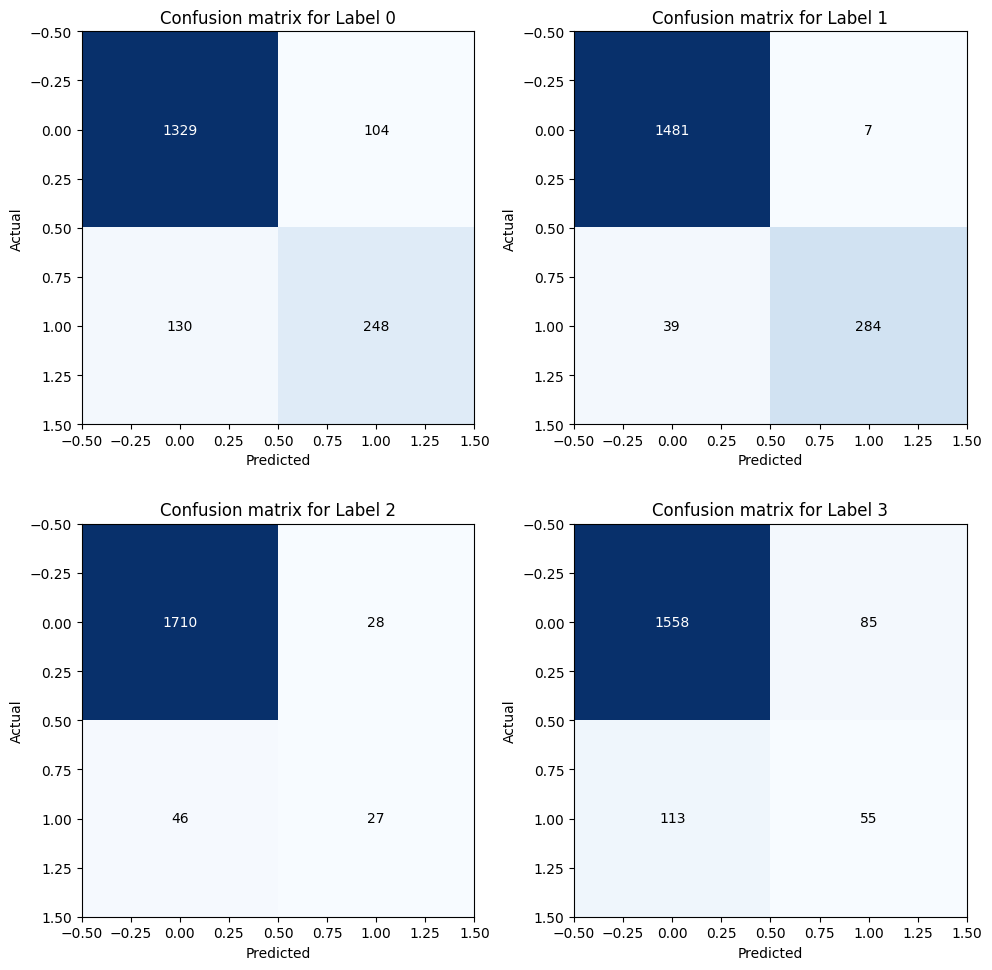

In [24]:
y_pred = final_model.predict(x_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary values

# Calculate the confusion matrix for each label
num_labels = y_test.shape[1]
confusion_matrices = []
for label in range(num_labels):
    label_confusion_matrix = confusion_matrix(y_test[:, label], y_pred_binary[:, label])
    confusion_matrices.append(label_confusion_matrix)

# Plot confusion matrix tables for each label
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for label, matrix in enumerate(confusion_matrices):
    row = label // 2
    col = label % 2
    ax = axes[row, col]
    ax.imshow(matrix, cmap='Blues')

    # Add labels to the table
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, str(matrix[i, j]), ha='center', va='center', color='white' if matrix[i, j] > matrix.max() / 2 else 'black')

    ax.set_title(f"Confusion matrix for Label {label}")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import classification_report

# Assuming you have your test data and labels stored in variables x_test and y_test
# You can get the predicted labels from your trained model using predict() method
y_pred = final_model.predict(x_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary values

# Calculate the classification report for all outcomes
classification_result = classification_report(y_test, y_pred_binary, target_names=['Outcome 0', 'Outcome 1', 'Outcome 2', 'Outcome 3'], output_dict=True)

# Print the classification report
for outcome, metrics in classification_result.items():
    print(f"Metrics for {outcome}:")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1-score: {metrics['f1-score']}")
    print("\n")


57/57 [==============================] - 0s 2ms/step
Metrics for Outcome 0:
Precision: 0.7045454545454546
Recall: 0.656084656084656
F1-score: 0.6794520547945205


Metrics for Outcome 1:
Precision: 0.9759450171821306
Recall: 0.8792569659442725
F1-score: 0.9250814332247557


Metrics for Outcome 2:
Precision: 0.4909090909090909
Recall: 0.3698630136986301
F1-score: 0.421875


Metrics for Outcome 3:
Precision: 0.39285714285714285
Recall: 0.3273809523809524
F1-score: 0.35714285714285715


Metrics for micro avg:
Precision: 0.7326968973747017
Recall: 0.6518046709129511
F1-score: 0.6898876404494383


Metrics for macro avg:
Precision: 0.6410641763734547
Recall: 0.5581463970271278
F1-score: 0.5958878362905333


Metrics for weighted avg:
Precision: 0.7254615562679126
Recall: 0.6518046709129511
F1-score: 0.686232542084846


Metrics for samples avg:
Precision: 0.20499723909442297
Recall: 0.19823302043070126
F1-score: 0.1925245194709579




C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
